In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset, DataLoader
from model.Cbow import CBOW
from model.SkipGram import SkipGram
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:
errors = [str(num) for num in np.random.randint(0,3,100).tolist()]+[chr(num+97) for num in np.random.randint(0,3,100)]
random.shuffle(errors)

In [9]:
numbers = " ".join([str(num) for num in np.random.randint(0,10,1000).tolist()])
chars = " ".join([chr(num+97) for num in np.random.randint(0,26,1000)])
errors = " ".join(errors) 
sentences = [numbers,chars,errors]
allwords = set(" ".join(sentences).split())

In [10]:
len(allwords)

36

In [11]:
word_to_index = {word:index for index,word in enumerate(allwords)}
index_to_word = {index:word for word, index in word_to_index.items()}

In [15]:
def gen_data(text,c):
    words = text.split()
    data = []
    for index,word in enumerate(words):
        for i in range(-c,c+1):
            if i!=0 and i+index<len(words) and i+index>-1:
                data.append((word,words[i+index]))
    return data


datasets = []
for sentence in sentences:
    datasets+=gen_data(sentence,2)


In [16]:
x = []
y = []
for index,dataset in enumerate(datasets):
    x.append(word_to_index[dataset[0]])
    y.append(word_to_index[dataset[1]])
    
        
x = torch.LongTensor(x)
y = torch.LongTensor(y)

train_dataset = TensorDataset(x,y)
train_loader = DataLoader(train_dataset,shuffle=True,batch_size=1000)

In [17]:
for x,y in train_loader:
    print(x.shape,y.shape)

torch.Size([1000]) torch.Size([1000])
torch.Size([1000]) torch.Size([1000])
torch.Size([1000]) torch.Size([1000])
torch.Size([1000]) torch.Size([1000])
torch.Size([1000]) torch.Size([1000])
torch.Size([1000]) torch.Size([1000])
torch.Size([1000]) torch.Size([1000])
torch.Size([1000]) torch.Size([1000])
torch.Size([782]) torch.Size([782])


In [18]:
model = SkipGram(36,2)
optimizer = optim.Adam(params=model.parameters(),lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [19]:
for epoch in range(100):
    for step,(x,y) in enumerate(train_loader):
        pre = model(x)
        loss = criterion(pre,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("epoch: {} step: {} loss: {:.4f}".format(epoch,step,loss))

epoch: 0 step: 0 loss: 3.7516
epoch: 0 step: 1 loss: 3.7735
epoch: 0 step: 2 loss: 3.7307
epoch: 0 step: 3 loss: 3.6925
epoch: 0 step: 4 loss: 3.7105
epoch: 0 step: 5 loss: 3.6608
epoch: 0 step: 6 loss: 3.7209
epoch: 0 step: 7 loss: 3.6894
epoch: 0 step: 8 loss: 3.6213
epoch: 1 step: 0 loss: 3.6460
epoch: 1 step: 1 loss: 3.6412
epoch: 1 step: 2 loss: 3.6211
epoch: 1 step: 3 loss: 3.6472
epoch: 1 step: 4 loss: 3.6269
epoch: 1 step: 5 loss: 3.6343
epoch: 1 step: 6 loss: 3.5969
epoch: 1 step: 7 loss: 3.5751
epoch: 1 step: 8 loss: 3.5899
epoch: 2 step: 0 loss: 3.5775
epoch: 2 step: 1 loss: 3.5835
epoch: 2 step: 2 loss: 3.5560
epoch: 2 step: 3 loss: 3.5832
epoch: 2 step: 4 loss: 3.5378
epoch: 2 step: 5 loss: 3.5469
epoch: 2 step: 6 loss: 3.5473
epoch: 2 step: 7 loss: 3.5513
epoch: 2 step: 8 loss: 3.5122
epoch: 3 step: 0 loss: 3.5031
epoch: 3 step: 1 loss: 3.5497
epoch: 3 step: 2 loss: 3.5105
epoch: 3 step: 3 loss: 3.5027
epoch: 3 step: 4 loss: 3.5029
epoch: 3 step: 5 loss: 3.4782
epoch: 3 s

epoch: 31 step: 3 loss: 2.8133
epoch: 31 step: 4 loss: 2.8405
epoch: 31 step: 5 loss: 2.8129
epoch: 31 step: 6 loss: 2.8319
epoch: 31 step: 7 loss: 2.8017
epoch: 31 step: 8 loss: 2.8149
epoch: 32 step: 0 loss: 2.8502
epoch: 32 step: 1 loss: 2.8304
epoch: 32 step: 2 loss: 2.7930
epoch: 32 step: 3 loss: 2.8161
epoch: 32 step: 4 loss: 2.8210
epoch: 32 step: 5 loss: 2.8089
epoch: 32 step: 6 loss: 2.8202
epoch: 32 step: 7 loss: 2.8381
epoch: 32 step: 8 loss: 2.8298
epoch: 33 step: 0 loss: 2.8269
epoch: 33 step: 1 loss: 2.8232
epoch: 33 step: 2 loss: 2.7928
epoch: 33 step: 3 loss: 2.7874
epoch: 33 step: 4 loss: 2.8258
epoch: 33 step: 5 loss: 2.8575
epoch: 33 step: 6 loss: 2.8285
epoch: 33 step: 7 loss: 2.8298
epoch: 33 step: 8 loss: 2.8243
epoch: 34 step: 0 loss: 2.8186
epoch: 34 step: 1 loss: 2.8391
epoch: 34 step: 2 loss: 2.8253
epoch: 34 step: 3 loss: 2.8227
epoch: 34 step: 4 loss: 2.8007
epoch: 34 step: 5 loss: 2.8092
epoch: 34 step: 6 loss: 2.8079
epoch: 34 step: 7 loss: 2.8134
epoch: 3

epoch: 61 step: 1 loss: 2.8388
epoch: 61 step: 2 loss: 2.7907
epoch: 61 step: 3 loss: 2.7653
epoch: 61 step: 4 loss: 2.7967
epoch: 61 step: 5 loss: 2.7901
epoch: 61 step: 6 loss: 2.8127
epoch: 61 step: 7 loss: 2.8074
epoch: 61 step: 8 loss: 2.8341
epoch: 62 step: 0 loss: 2.8257
epoch: 62 step: 1 loss: 2.8029
epoch: 62 step: 2 loss: 2.8025
epoch: 62 step: 3 loss: 2.7816
epoch: 62 step: 4 loss: 2.8125
epoch: 62 step: 5 loss: 2.7927
epoch: 62 step: 6 loss: 2.8056
epoch: 62 step: 7 loss: 2.8139
epoch: 62 step: 8 loss: 2.7855
epoch: 63 step: 0 loss: 2.7893
epoch: 63 step: 1 loss: 2.7878
epoch: 63 step: 2 loss: 2.8065
epoch: 63 step: 3 loss: 2.8049
epoch: 63 step: 4 loss: 2.8168
epoch: 63 step: 5 loss: 2.7995
epoch: 63 step: 6 loss: 2.8135
epoch: 63 step: 7 loss: 2.8096
epoch: 63 step: 8 loss: 2.7903
epoch: 64 step: 0 loss: 2.8145
epoch: 64 step: 1 loss: 2.7902
epoch: 64 step: 2 loss: 2.8109
epoch: 64 step: 3 loss: 2.7843
epoch: 64 step: 4 loss: 2.8021
epoch: 64 step: 5 loss: 2.8003
epoch: 6

epoch: 92 step: 0 loss: 2.7921
epoch: 92 step: 1 loss: 2.7660
epoch: 92 step: 2 loss: 2.7906
epoch: 92 step: 3 loss: 2.7907
epoch: 92 step: 4 loss: 2.8143
epoch: 92 step: 5 loss: 2.7720
epoch: 92 step: 6 loss: 2.8067
epoch: 92 step: 7 loss: 2.8061
epoch: 92 step: 8 loss: 2.8228
epoch: 93 step: 0 loss: 2.7979
epoch: 93 step: 1 loss: 2.8013
epoch: 93 step: 2 loss: 2.7716
epoch: 93 step: 3 loss: 2.7984
epoch: 93 step: 4 loss: 2.8163
epoch: 93 step: 5 loss: 2.7947
epoch: 93 step: 6 loss: 2.7843
epoch: 93 step: 7 loss: 2.7801
epoch: 93 step: 8 loss: 2.8109
epoch: 94 step: 0 loss: 2.7979
epoch: 94 step: 1 loss: 2.8094
epoch: 94 step: 2 loss: 2.7606
epoch: 94 step: 3 loss: 2.7900
epoch: 94 step: 4 loss: 2.8005
epoch: 94 step: 5 loss: 2.7736
epoch: 94 step: 6 loss: 2.8132
epoch: 94 step: 7 loss: 2.8083
epoch: 94 step: 8 loss: 2.7999
epoch: 95 step: 0 loss: 2.7910
epoch: 95 step: 1 loss: 2.7799
epoch: 95 step: 2 loss: 2.8007
epoch: 95 step: 3 loss: 2.7829
epoch: 95 step: 4 loss: 2.8086
epoch: 9

epoch: 121 step: 0 loss: 2.7995
epoch: 121 step: 1 loss: 2.7930
epoch: 121 step: 2 loss: 2.7975
epoch: 121 step: 3 loss: 2.7793
epoch: 121 step: 4 loss: 2.7994
epoch: 121 step: 5 loss: 2.7926
epoch: 121 step: 6 loss: 2.7859
epoch: 121 step: 7 loss: 2.7914
epoch: 121 step: 8 loss: 2.7828
epoch: 122 step: 0 loss: 2.8002
epoch: 122 step: 1 loss: 2.7847
epoch: 122 step: 2 loss: 2.7858
epoch: 122 step: 3 loss: 2.7728
epoch: 122 step: 4 loss: 2.7827
epoch: 122 step: 5 loss: 2.8170
epoch: 122 step: 6 loss: 2.7771
epoch: 122 step: 7 loss: 2.7811
epoch: 122 step: 8 loss: 2.8261
epoch: 123 step: 0 loss: 2.7732
epoch: 123 step: 1 loss: 2.7707
epoch: 123 step: 2 loss: 2.7919
epoch: 123 step: 3 loss: 2.7814
epoch: 123 step: 4 loss: 2.7608
epoch: 123 step: 5 loss: 2.7870
epoch: 123 step: 6 loss: 2.8227
epoch: 123 step: 7 loss: 2.8112
epoch: 123 step: 8 loss: 2.8279
epoch: 124 step: 0 loss: 2.8205
epoch: 124 step: 1 loss: 2.7797
epoch: 124 step: 2 loss: 2.7699
epoch: 124 step: 3 loss: 2.7918
epoch: 1

epoch: 149 step: 5 loss: 2.7962
epoch: 149 step: 6 loss: 2.7835
epoch: 149 step: 7 loss: 2.8112
epoch: 149 step: 8 loss: 2.8293
epoch: 150 step: 0 loss: 2.8085
epoch: 150 step: 1 loss: 2.7856
epoch: 150 step: 2 loss: 2.7920
epoch: 150 step: 3 loss: 2.8045
epoch: 150 step: 4 loss: 2.7986
epoch: 150 step: 5 loss: 2.7842
epoch: 150 step: 6 loss: 2.7718
epoch: 150 step: 7 loss: 2.7818
epoch: 150 step: 8 loss: 2.7803
epoch: 151 step: 0 loss: 2.7601
epoch: 151 step: 1 loss: 2.7820
epoch: 151 step: 2 loss: 2.7826
epoch: 151 step: 3 loss: 2.8067
epoch: 151 step: 4 loss: 2.7742
epoch: 151 step: 5 loss: 2.8054
epoch: 151 step: 6 loss: 2.7981
epoch: 151 step: 7 loss: 2.7992
epoch: 151 step: 8 loss: 2.7999
epoch: 152 step: 0 loss: 2.7867
epoch: 152 step: 1 loss: 2.8013
epoch: 152 step: 2 loss: 2.7873
epoch: 152 step: 3 loss: 2.7983
epoch: 152 step: 4 loss: 2.7981
epoch: 152 step: 5 loss: 2.7979
epoch: 152 step: 6 loss: 2.7703
epoch: 152 step: 7 loss: 2.7720
epoch: 152 step: 8 loss: 2.7956
epoch: 1

KeyboardInterrupt: 

In [20]:
for name,para in model.named_parameters():
    if name=='embedding.weight':
        emb_para = para
    #print(name,para.shape)

In [21]:
words_emb = []
for word_emb in emb_para:
    words_emb.append(word_emb.detach().numpy())
words_emb = np.array(words_emb)
txt = list(index_to_word.values())

In [22]:
words_emb.shape

(36, 2)

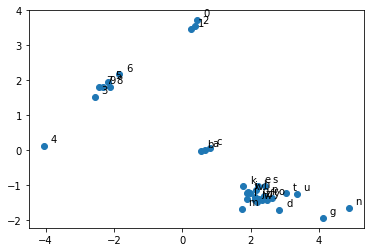

In [25]:
plt.scatter(words_emb[:,0],words_emb[:,1])
for i in range(words_emb.shape[0]):
    plt.annotate(txt[i], xy = (words_emb[i,0],words_emb[i,1]), xytext = (words_emb[i,0]+0.2,words_emb[i,1]+0.1)) # 这里xy是需要标记的坐标，xytext是对应的标签坐标
plt.show()

In [26]:
def gen_data_cbow(docs):
    data = []
    for doc in docs:
        doc = doc.split()
        for i in range(2,len(doc)-2):
            bow = ([doc[i-2],doc[i-1],doc[i+1],doc[i+2]],doc[i])
            data.append(bow)
    return data

datasets = gen_data_cbow(sentences)
x = []
y = []
for dataset in datasets:
    x.append([word_to_index[word] for word in dataset[0]])
    y.append(word_to_index[dataset[1]])
x = torch.LongTensor(x)
y = torch.LongTensor(y)
datasets = TensorDataset(x,y)
data_loader = DataLoader(datasets,batch_size=512,shuffle=True)


In [27]:
emb = nn.Embedding(36,2)
fc = nn.Linear(2,36)
for x,y in data_loader:
    print(emb(x).shape,fc(emb(x)).shape)
    print(model(x).shape)
    

torch.Size([512, 4, 2]) torch.Size([512, 4, 36])
torch.Size([512, 4, 36])
torch.Size([512, 4, 2]) torch.Size([512, 4, 36])
torch.Size([512, 4, 36])
torch.Size([512, 4, 2]) torch.Size([512, 4, 36])
torch.Size([512, 4, 36])
torch.Size([512, 4, 2]) torch.Size([512, 4, 36])
torch.Size([512, 4, 36])
torch.Size([140, 4, 2]) torch.Size([140, 4, 36])
torch.Size([140, 4, 36])


In [28]:
model = CBOW(36,2)
optimizer = optim.Adam(params=model.parameters(),lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [31]:
for epoch in range(500):
    for step,(x,y) in enumerate(data_loader):
        pre = model(x)
        loss = criterion(pre,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("epoch: {} step: {} loss: {:.4f}".format(epoch,step,loss))

epoch: 0 step: 0 loss: 2.7324
epoch: 0 step: 1 loss: 2.6758
epoch: 0 step: 2 loss: 2.6588
epoch: 0 step: 3 loss: 2.6670
epoch: 0 step: 4 loss: 2.6351
epoch: 1 step: 0 loss: 2.6931
epoch: 1 step: 1 loss: 2.6862
epoch: 1 step: 2 loss: 2.6785
epoch: 1 step: 3 loss: 2.6438
epoch: 1 step: 4 loss: 2.7438
epoch: 2 step: 0 loss: 2.6756
epoch: 2 step: 1 loss: 2.6743
epoch: 2 step: 2 loss: 2.7026
epoch: 2 step: 3 loss: 2.6588
epoch: 2 step: 4 loss: 2.7116
epoch: 3 step: 0 loss: 2.6617
epoch: 3 step: 1 loss: 2.6684
epoch: 3 step: 2 loss: 2.6977
epoch: 3 step: 3 loss: 2.6930
epoch: 3 step: 4 loss: 2.6788
epoch: 4 step: 0 loss: 2.7113
epoch: 4 step: 1 loss: 2.6582
epoch: 4 step: 2 loss: 2.6592
epoch: 4 step: 3 loss: 2.6836
epoch: 4 step: 4 loss: 2.7110
epoch: 5 step: 0 loss: 2.6879
epoch: 5 step: 1 loss: 2.7058
epoch: 5 step: 2 loss: 2.6888
epoch: 5 step: 3 loss: 2.6576
epoch: 5 step: 4 loss: 2.6036
epoch: 6 step: 0 loss: 2.6632
epoch: 6 step: 1 loss: 2.6644
epoch: 6 step: 2 loss: 2.6753
epoch: 6 s

epoch: 57 step: 0 loss: 2.6679
epoch: 57 step: 1 loss: 2.6710
epoch: 57 step: 2 loss: 2.6642
epoch: 57 step: 3 loss: 2.6876
epoch: 57 step: 4 loss: 2.7105
epoch: 58 step: 0 loss: 2.6746
epoch: 58 step: 1 loss: 2.6558
epoch: 58 step: 2 loss: 2.6917
epoch: 58 step: 3 loss: 2.6606
epoch: 58 step: 4 loss: 2.7367
epoch: 59 step: 0 loss: 2.6752
epoch: 59 step: 1 loss: 2.6840
epoch: 59 step: 2 loss: 2.6735
epoch: 59 step: 3 loss: 2.6675
epoch: 59 step: 4 loss: 2.6740
epoch: 60 step: 0 loss: 2.6712
epoch: 60 step: 1 loss: 2.6930
epoch: 60 step: 2 loss: 2.6899
epoch: 60 step: 3 loss: 2.6577
epoch: 60 step: 4 loss: 2.6359
epoch: 61 step: 0 loss: 2.6480
epoch: 61 step: 1 loss: 2.6636
epoch: 61 step: 2 loss: 2.7197
epoch: 61 step: 3 loss: 2.6730
epoch: 61 step: 4 loss: 2.6710
epoch: 62 step: 0 loss: 2.6585
epoch: 62 step: 1 loss: 2.7417
epoch: 62 step: 2 loss: 2.6536
epoch: 62 step: 3 loss: 2.6599
epoch: 62 step: 4 loss: 2.6358
epoch: 63 step: 0 loss: 2.6765
epoch: 63 step: 1 loss: 2.7085
epoch: 6

epoch: 111 step: 2 loss: 2.6892
epoch: 111 step: 3 loss: 2.6544
epoch: 111 step: 4 loss: 2.6829
epoch: 112 step: 0 loss: 2.6686
epoch: 112 step: 1 loss: 2.6648
epoch: 112 step: 2 loss: 2.6869
epoch: 112 step: 3 loss: 2.6541
epoch: 112 step: 4 loss: 2.7227
epoch: 113 step: 0 loss: 2.6451
epoch: 113 step: 1 loss: 2.6548
epoch: 113 step: 2 loss: 2.6826
epoch: 113 step: 3 loss: 2.6881
epoch: 113 step: 4 loss: 2.7304
epoch: 114 step: 0 loss: 2.6267
epoch: 114 step: 1 loss: 2.6997
epoch: 114 step: 2 loss: 2.6814
epoch: 114 step: 3 loss: 2.6873
epoch: 114 step: 4 loss: 2.6398
epoch: 115 step: 0 loss: 2.6551
epoch: 115 step: 1 loss: 2.6599
epoch: 115 step: 2 loss: 2.6678
epoch: 115 step: 3 loss: 2.7004
epoch: 115 step: 4 loss: 2.6715
epoch: 116 step: 0 loss: 2.6953
epoch: 116 step: 1 loss: 2.7098
epoch: 116 step: 2 loss: 2.6644
epoch: 116 step: 3 loss: 2.6189
epoch: 116 step: 4 loss: 2.6536
epoch: 117 step: 0 loss: 2.6798
epoch: 117 step: 1 loss: 2.6858
epoch: 117 step: 2 loss: 2.6591
epoch: 1

epoch: 164 step: 2 loss: 2.6269
epoch: 164 step: 3 loss: 2.7186
epoch: 164 step: 4 loss: 2.6916
epoch: 165 step: 0 loss: 2.6789
epoch: 165 step: 1 loss: 2.6492
epoch: 165 step: 2 loss: 2.6634
epoch: 165 step: 3 loss: 2.6936
epoch: 165 step: 4 loss: 2.6381
epoch: 166 step: 0 loss: 2.6593
epoch: 166 step: 1 loss: 2.6942
epoch: 166 step: 2 loss: 2.6702
epoch: 166 step: 3 loss: 2.6328
epoch: 166 step: 4 loss: 2.7429
epoch: 167 step: 0 loss: 2.6622
epoch: 167 step: 1 loss: 2.6784
epoch: 167 step: 2 loss: 2.6923
epoch: 167 step: 3 loss: 2.6410
epoch: 167 step: 4 loss: 2.6836
epoch: 168 step: 0 loss: 2.6940
epoch: 168 step: 1 loss: 2.6464
epoch: 168 step: 2 loss: 2.6565
epoch: 168 step: 3 loss: 2.6658
epoch: 168 step: 4 loss: 2.7246
epoch: 169 step: 0 loss: 2.7002
epoch: 169 step: 1 loss: 2.6497
epoch: 169 step: 2 loss: 2.6572
epoch: 169 step: 3 loss: 2.6759
epoch: 169 step: 4 loss: 2.6513
epoch: 170 step: 0 loss: 2.6531
epoch: 170 step: 1 loss: 2.6790
epoch: 170 step: 2 loss: 2.6856
epoch: 1

epoch: 219 step: 1 loss: 2.6403
epoch: 219 step: 2 loss: 2.6229
epoch: 219 step: 3 loss: 2.7343
epoch: 219 step: 4 loss: 2.6972
epoch: 220 step: 0 loss: 2.6658
epoch: 220 step: 1 loss: 2.6607
epoch: 220 step: 2 loss: 2.6481
epoch: 220 step: 3 loss: 2.6792
epoch: 220 step: 4 loss: 2.7282
epoch: 221 step: 0 loss: 2.6566
epoch: 221 step: 1 loss: 2.7221
epoch: 221 step: 2 loss: 2.6772
epoch: 221 step: 3 loss: 2.6249
epoch: 221 step: 4 loss: 2.6256
epoch: 222 step: 0 loss: 2.6692
epoch: 222 step: 1 loss: 2.6817
epoch: 222 step: 2 loss: 2.6468
epoch: 222 step: 3 loss: 2.6469
epoch: 222 step: 4 loss: 2.7696
epoch: 223 step: 0 loss: 2.6730
epoch: 223 step: 1 loss: 2.6840
epoch: 223 step: 2 loss: 2.6416
epoch: 223 step: 3 loss: 2.6686
epoch: 223 step: 4 loss: 2.6932
epoch: 224 step: 0 loss: 2.7041
epoch: 224 step: 1 loss: 2.6240
epoch: 224 step: 2 loss: 2.6440
epoch: 224 step: 3 loss: 2.6879
epoch: 224 step: 4 loss: 2.7162
epoch: 225 step: 0 loss: 2.6162
epoch: 225 step: 1 loss: 2.6602
epoch: 2

epoch: 274 step: 3 loss: 2.6918
epoch: 274 step: 4 loss: 2.5561
epoch: 275 step: 0 loss: 2.6465
epoch: 275 step: 1 loss: 2.7160
epoch: 275 step: 2 loss: 2.6703
epoch: 275 step: 3 loss: 2.6563
epoch: 275 step: 4 loss: 2.5756
epoch: 276 step: 0 loss: 2.6629
epoch: 276 step: 1 loss: 2.6671
epoch: 276 step: 2 loss: 2.6684
epoch: 276 step: 3 loss: 2.6539
epoch: 276 step: 4 loss: 2.7079
epoch: 277 step: 0 loss: 2.6633
epoch: 277 step: 1 loss: 2.6775
epoch: 277 step: 2 loss: 2.6384
epoch: 277 step: 3 loss: 2.6791
epoch: 277 step: 4 loss: 2.7006
epoch: 278 step: 0 loss: 2.6620
epoch: 278 step: 1 loss: 2.6531
epoch: 278 step: 2 loss: 2.6758
epoch: 278 step: 3 loss: 2.6644
epoch: 278 step: 4 loss: 2.7202
epoch: 279 step: 0 loss: 2.6711
epoch: 279 step: 1 loss: 2.6649
epoch: 279 step: 2 loss: 2.6987
epoch: 279 step: 3 loss: 2.6350
epoch: 279 step: 4 loss: 2.6543
epoch: 280 step: 0 loss: 2.6412
epoch: 280 step: 1 loss: 2.6458
epoch: 280 step: 2 loss: 2.6988
epoch: 280 step: 3 loss: 2.6930
epoch: 2

epoch: 329 step: 1 loss: 2.6838
epoch: 329 step: 2 loss: 2.6530
epoch: 329 step: 3 loss: 2.6706
epoch: 329 step: 4 loss: 2.6244
epoch: 330 step: 0 loss: 2.6547
epoch: 330 step: 1 loss: 2.6415
epoch: 330 step: 2 loss: 2.6818
epoch: 330 step: 3 loss: 2.6566
epoch: 330 step: 4 loss: 2.7520
epoch: 331 step: 0 loss: 2.6418
epoch: 331 step: 1 loss: 2.6788
epoch: 331 step: 2 loss: 2.6657
epoch: 331 step: 3 loss: 2.6630
epoch: 331 step: 4 loss: 2.7164
epoch: 332 step: 0 loss: 2.6981
epoch: 332 step: 1 loss: 2.6769
epoch: 332 step: 2 loss: 2.6586
epoch: 332 step: 3 loss: 2.6385
epoch: 332 step: 4 loss: 2.6316
epoch: 333 step: 0 loss: 2.6841
epoch: 333 step: 1 loss: 2.6722
epoch: 333 step: 2 loss: 2.6610
epoch: 333 step: 3 loss: 2.6504
epoch: 333 step: 4 loss: 2.6367
epoch: 334 step: 0 loss: 2.6549
epoch: 334 step: 1 loss: 2.6996
epoch: 334 step: 2 loss: 2.6536
epoch: 334 step: 3 loss: 2.6684
epoch: 334 step: 4 loss: 2.6031
epoch: 335 step: 0 loss: 2.6444
epoch: 335 step: 1 loss: 2.6636
epoch: 3

epoch: 383 step: 1 loss: 2.6704
epoch: 383 step: 2 loss: 2.6580
epoch: 383 step: 3 loss: 2.6607
epoch: 383 step: 4 loss: 2.6980
epoch: 384 step: 0 loss: 2.6559
epoch: 384 step: 1 loss: 2.6746
epoch: 384 step: 2 loss: 2.7102
epoch: 384 step: 3 loss: 2.6437
epoch: 384 step: 4 loss: 2.5625
epoch: 385 step: 0 loss: 2.6522
epoch: 385 step: 1 loss: 2.6802
epoch: 385 step: 2 loss: 2.6514
epoch: 385 step: 3 loss: 2.6770
epoch: 385 step: 4 loss: 2.6459
epoch: 386 step: 0 loss: 2.6858
epoch: 386 step: 1 loss: 2.6630
epoch: 386 step: 2 loss: 2.6554
epoch: 386 step: 3 loss: 2.6673
epoch: 386 step: 4 loss: 2.6113
epoch: 387 step: 0 loss: 2.6827
epoch: 387 step: 1 loss: 2.6471
epoch: 387 step: 2 loss: 2.6475
epoch: 387 step: 3 loss: 2.6721
epoch: 387 step: 4 loss: 2.7014
epoch: 388 step: 0 loss: 2.6444
epoch: 388 step: 1 loss: 2.6377
epoch: 388 step: 2 loss: 2.6951
epoch: 388 step: 3 loss: 2.6825
epoch: 388 step: 4 loss: 2.6527
epoch: 389 step: 0 loss: 2.6939
epoch: 389 step: 1 loss: 2.7035
epoch: 3

epoch: 438 step: 0 loss: 2.6455
epoch: 438 step: 1 loss: 2.6469
epoch: 438 step: 2 loss: 2.6184
epoch: 438 step: 3 loss: 2.7493
epoch: 438 step: 4 loss: 2.6449
epoch: 439 step: 0 loss: 2.6634
epoch: 439 step: 1 loss: 2.6842
epoch: 439 step: 2 loss: 2.6319
epoch: 439 step: 3 loss: 2.6878
epoch: 439 step: 4 loss: 2.6301
epoch: 440 step: 0 loss: 2.6289
epoch: 440 step: 1 loss: 2.6645
epoch: 440 step: 2 loss: 2.6284
epoch: 440 step: 3 loss: 2.7161
epoch: 440 step: 4 loss: 2.7293
epoch: 441 step: 0 loss: 2.6340
epoch: 441 step: 1 loss: 2.6956
epoch: 441 step: 2 loss: 2.6587
epoch: 441 step: 3 loss: 2.6649
epoch: 441 step: 4 loss: 2.6721
epoch: 442 step: 0 loss: 2.6584
epoch: 442 step: 1 loss: 2.6842
epoch: 442 step: 2 loss: 2.6648
epoch: 442 step: 3 loss: 2.6421
epoch: 442 step: 4 loss: 2.6902
epoch: 443 step: 0 loss: 2.6268
epoch: 443 step: 1 loss: 2.6082
epoch: 443 step: 2 loss: 2.7065
epoch: 443 step: 3 loss: 2.7161
epoch: 443 step: 4 loss: 2.6542
epoch: 444 step: 0 loss: 2.6383
epoch: 4

epoch: 491 step: 3 loss: 2.6854
epoch: 491 step: 4 loss: 2.7505
epoch: 492 step: 0 loss: 2.6454
epoch: 492 step: 1 loss: 2.6512
epoch: 492 step: 2 loss: 2.6598
epoch: 492 step: 3 loss: 2.6996
epoch: 492 step: 4 loss: 2.6395
epoch: 493 step: 0 loss: 2.6247
epoch: 493 step: 1 loss: 2.6626
epoch: 493 step: 2 loss: 2.6809
epoch: 493 step: 3 loss: 2.6981
epoch: 493 step: 4 loss: 2.6077
epoch: 494 step: 0 loss: 2.6417
epoch: 494 step: 1 loss: 2.6671
epoch: 494 step: 2 loss: 2.6511
epoch: 494 step: 3 loss: 2.6959
epoch: 494 step: 4 loss: 2.6437
epoch: 495 step: 0 loss: 2.6790
epoch: 495 step: 1 loss: 2.6409
epoch: 495 step: 2 loss: 2.6744
epoch: 495 step: 3 loss: 2.6645
epoch: 495 step: 4 loss: 2.6430
epoch: 496 step: 0 loss: 2.6716
epoch: 496 step: 1 loss: 2.6738
epoch: 496 step: 2 loss: 2.6421
epoch: 496 step: 3 loss: 2.6808
epoch: 496 step: 4 loss: 2.6101
epoch: 497 step: 0 loss: 2.6504
epoch: 497 step: 1 loss: 2.6925
epoch: 497 step: 2 loss: 2.6349
epoch: 497 step: 3 loss: 2.6691
epoch: 4

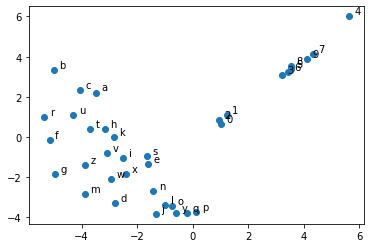

In [32]:
for name,para in model.named_parameters():
    if name=='embedding.weight':
        emb_para = para
    #print(name,para.shape)
words_emb = []
for word_emb in emb_para:
    words_emb.append(word_emb.detach().numpy())
words_emb = np.array(words_emb)
txt = list(index_to_word.values())
plt.scatter(words_emb[:,0],words_emb[:,1])
for i in range(words_emb.shape[0]):
    plt.annotate(txt[i], xy = (words_emb[i,0],words_emb[i,1]), xytext = (words_emb[i,0]+0.2,words_emb[i,1]+0.1)) # 这里xy是需要标记的坐标，xytext是对应的标签坐标
plt.show()